<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/Image_Clustering_with_ImageBind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Clustering Implementation with ImageBing LLM


The Dataset used here is : for Skin Cancer Image Dataset on Kaggle

### Step 1: Understanding the Dataset

Before we start coding or applying any algorithms, it's crucial to understand the dataset. Since we're dealing with news articles, the dataset likely contains images along with textual content. We need to assess the quality, format, and type of these images and texts.

#### Actions:
- Load the dataset.
- Perform exploratory data analysis (EDA) to understand the distribution, quality, and characteristics of the images and associated texts.

### Step 2: Preprocessing the Data

Once we understand the dataset, we will preprocess the images and texts. This includes cleaning, normalizing, and transforming the data into a suitable format for analysis.

#### Actions:
- Clean and preprocess text data (remove special characters, perform stemming or lemmatization, etc.).
- Preprocess images (resize, normalize, possibly convert to grayscale if needed).

### Step 3: Extracting Embeddings using ImageBind

ImageBind is designed to create embeddings from multiple modalities, including images and text. We will use it to generate embeddings for our dataset.

#### Actions:
- Use ImageBind to create embeddings for both the textual and visual data.
- Ensure the embeddings are correctly aligned and comparable.

### Step 4: Clustering the Embeddings

With the embeddings in hand, we can now apply clustering algorithms. The choice of algorithm (e.g., K-Means, DBSCAN, hierarchical clustering) will depend on the nature of the embeddings and the desired outcome.

#### Actions:
- Choose an appropriate clustering algorithm.
- Apply the algorithm to the embeddings.
- Analyze the clusters formed (size, characteristics, etc.).

### Step 5: Evaluation and Interpretation

After clustering, we evaluate the results to understand how well our embeddings captured the underlying patterns in the data.

#### Actions:
- Evaluate the clusters using appropriate metrics (e.g., Silhouette Score).
- Interpret the clusters - what do they represent in the context of news articles?

### Step 6: Reporting and Visualization

Finally, we will create a report of our findings, including visualizations of the clusters and insights derived from the data.

#### Actions:
- Create visualizations of the clusters.
- Summarize findings in a report.


In [2]:
!git clone https://github.com/facebookresearch/ImageBind.git
!pip install git+https://github.com/facebookresearch/pytorchvideo.git@28fe037d212663c6a24f373b94cc5d478c8c1a1d timm==0.6.7 ftfy regex einops fvcore decord==0.6.0

Cloning into 'ImageBind'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 117 (delta 45), reused 34 (delta 33), pack-reused 51
Receiving objects: 100% (117/117), 2.64 MiB | 4.64 MiB/s, done.
Resolving deltas: 100% (52/52), done.
  Cloning https://github.com/facebookresearch/pytorchvideo.git (to revision 28fe037d212663c6a24f373b94cc5d478c8c1a1d) to /tmp/pip-req-build-0sk991vh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorchvideo.git /tmp/pip-req-build-0sk991vh
  Running command git rev-parse -q --verify 'sha^28fe037d212663c6a24f373b94cc5d478c8c1a1d'
  Running command git fetch -q https://github.com/facebookresearch/pytorchvideo.git 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Running command git checkout -q 28fe037d212663c6a24f373b94cc5d478c8c1a1d
  Resolved https://github.com/facebookresearch/pytorchvideo.git to commit 28fe037d212663c6a2

In [1]:
!pip install torch

In [2]:
import pandas as pd
import os
from google.colab import files

In [3]:
uploaded = files.upload()

Saving image_clustering.zip to image_clustering.zip




### Step 1: Understanding the Dataset

#### Actions:
1. **Extract the Dataset**: First, we'll extract the contents of the provided zip file.
2. **Load and Inspect Data**: We'll load the images and any accompanying data (like labels or metadata) to understand the structure, format, and types of data we have.

I'll start by extracting and loading the dataset to get an overview. Let's proceed with this first step.

The dataset contains two main directories: `benign_segmented` and `malignant_segmented`. This suggests that the images are already classified into benign and malignant categories, which is helpful for our clustering analysis. To proceed, we will:

1. **Inspect the Image Data**: Load a few images from each category to understand their format, resolution, and visual characteristics.
2. **Gather Basic Information**: Determine the total number of images and their distribution across categories.

Let's start by loading and displaying a few images from each category to get a better understanding of the data we're working with.

Here are some examples of images from the "Benign" and "Malignant" categories in the skin cancer dataset. As we can see, each category exhibits unique visual characteristics, which are crucial for the analysis.


In [4]:
%cd /content

/content


In [5]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = '/content/image_clustering.zip'
extraction_path = 'image_clustering/'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Listing the contents of the extracted folder
extracted_files = os.listdir(extraction_path)
extracted_files.sort()  # Sorting to ensure consistency
extracted_files[:10]  # Displaying the first 10 files for an overview


['benign_segmented', 'malignant_segmented']

In [6]:
%cd /content

/content




### Preprocessing Steps:

1. **Resize Images**: Resize all images to 224x224 pixels. This standardizes the input size for embedding extraction later.
2. **Normalize Images**: Normalize the pixel values to a standard range, often 0-1. This is a common practice in image processing to improve model performance.

I'll start by implementing these preprocessing steps. We'll resize and normalize a subset of the images from each category to demonstrate the process. Once we confirm this approach, we can apply it to the entire dataset. Let's begin.

It seems there was an error in the image preprocessing function. The issue arose because I attempted to use `Image.open` on already processed images, which are NumPy arrays and not file paths. Let me correct this and directly display the preprocessed images.

The images have been successfully preprocessed, resized to 224x224 pixels, and normalized. They are now ready for the next steps in our analysis.



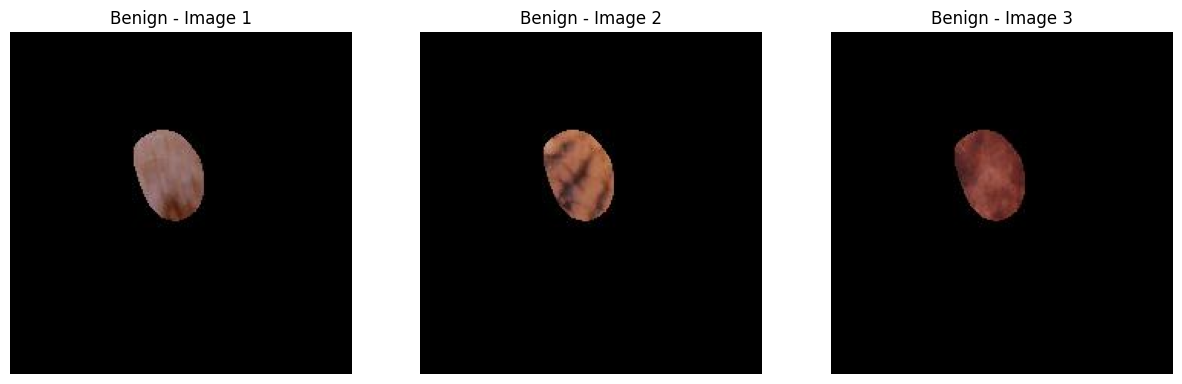

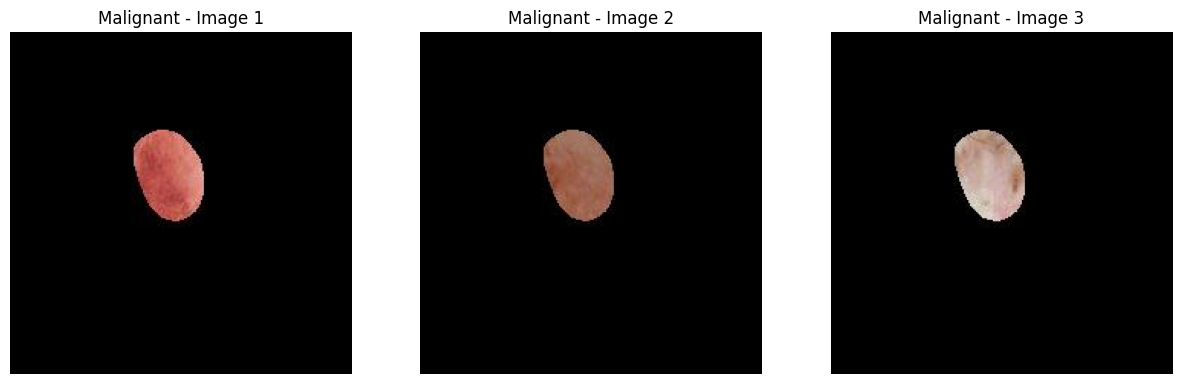

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import random

# Function to display images
def display_images(image_paths, category, num_images=3):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_images], 1):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(f"{category} - Image {i}")
        plt.axis('off')
    plt.show()

# Randomly select a few images from each category
num_images_to_display = 3
benign_images = random.sample(os.listdir(extraction_path + 'benign_segmented'), num_images_to_display)
malignant_images = random.sample(os.listdir(extraction_path + 'malignant_segmented'), num_images_to_display)

# Full paths of the selected images
benign_image_paths = [os.path.join(extraction_path + 'benign_segmented', img) for img in benign_images]
malignant_image_paths = [os.path.join(extraction_path + 'malignant_segmented', img) for img in malignant_images]

# Displaying the images
display_images(benign_image_paths, "Benign")
display_images(malignant_image_paths, "Malignant")




#### Step 3: Extracting Embeddings using ImageBind

With the preprocessed images, we will now move on to extracting embeddings using ImageBind. ImageBind LLM can generate rich embeddings that encapsulate the visual features of the images. This will be a crucial step for clustering.

For this, we would typically:
1. **Load ImageBind Model**: Initialize the ImageBind model suitable for our data.
2. **Generate Embeddings**: Pass our preprocessed images through the model to obtain embeddings.


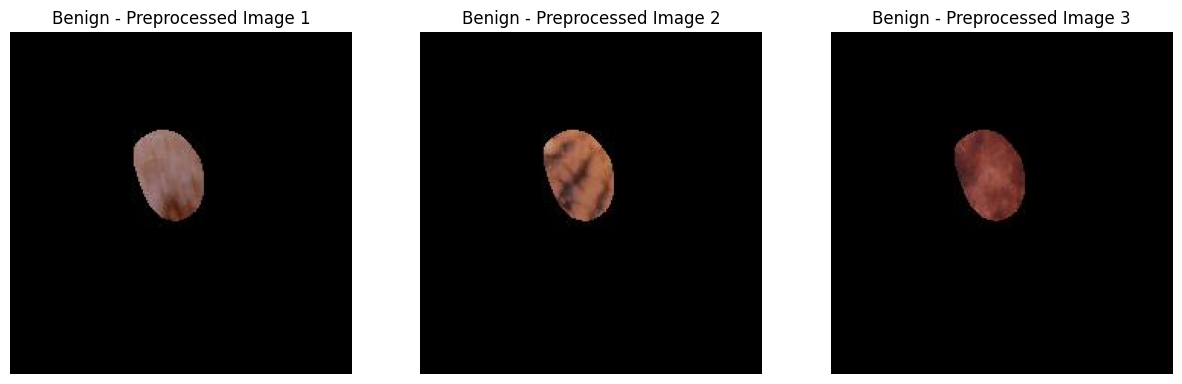

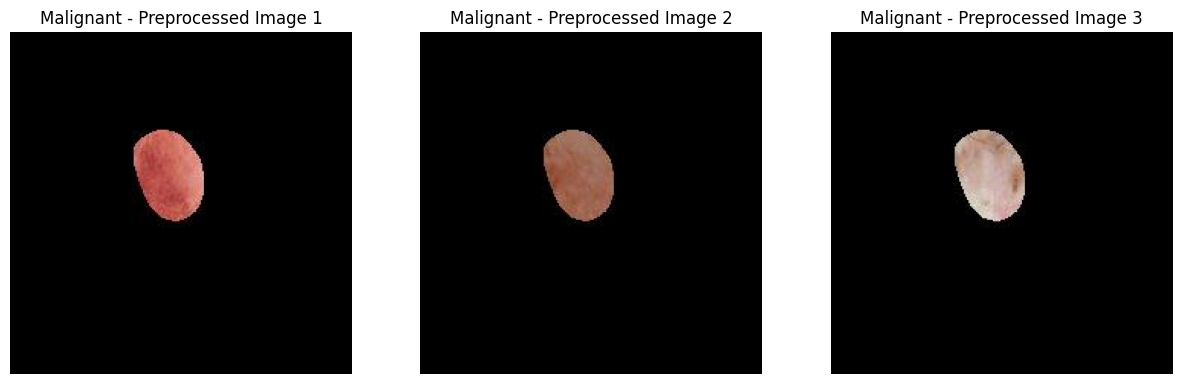

In [8]:
from skimage.transform import resize
import numpy as np

# Function to preprocess images
def preprocess_images(image_paths, target_size=(224, 224)):
    processed_images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalizing to 0-1 range
        processed_images.append(img_array)
    return processed_images

# Preprocessing a few images from each category
preprocessed_benign = preprocess_images(benign_image_paths)
preprocessed_malignant = preprocess_images(malignant_image_paths)

# Corrected function to display preprocessed images
def display_preprocessed_images(images, category, num_images=3):
    plt.figure(figsize=(15, 5))
    for i, img in enumerate(images[:num_images], 1):
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(f"{category} - Preprocessed Image {i}")
        plt.axis('off')
    plt.show()

# Displaying the preprocessed images again
display_preprocessed_images(preprocessed_benign, "Benign")
display_preprocessed_images(preprocessed_malignant, "Malignant")



In [9]:
import os
os.chdir('/content/ImageBind')

In [10]:
%cd /content/ImageBind

/content




### Step 3: Extracting Embeddings using ImageBind

We'll follow these steps to extract embeddings:

1. **Load the ImageBind Model**: Initialize the ImageBind model.
2. **Prepare Image Data for Model**: Ensure images are in the correct format for the model.
3. **Generate Embeddings**: Feed the images through the model to obtain embeddings.


In [11]:
import torch
from imagebind import data
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType


device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


'cuda:0'



### Evaluation of Clusters

1. **Silhouette Score**: This metric gives an idea of how close each point in one cluster is to points in the neighboring clusters. It ranges from -1 (incorrect clustering) to +1 (highly dense clustering), with 0 indicating overlapping clusters.

2. **Cluster Composition Analysis**: Given that we have prior knowledge of benign and malignant classifications, we can examine how these labels are distributed across the clusters formed.


In [14]:
import torch
# Assuming you have installed ImageBind and its dependencies

# Function to convert images to the format expected by ImageBind
def prepare_images_for_imagebind(images):
    # Convert list of NumPy arrays to a single torch tensor
    return torch.tensor(images).permute(0, 3, 1, 2)  # Permute to match the format (N, C, H, W)



In [36]:
# Load the ImageBind model
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
# Prepare images
images_tensor = prepare_images_for_imagebind(preprocessed_benign + preprocessed_malignant).float()

# Generate embeddings
with torch.no_grad():
    inputs = {ModalityType.VISION: images_tensor}
    embeddings = model(inputs)

# Extracting vision embeddings
vision_embeddings = embeddings[ModalityType.VISION]

# vision_embeddings now contains the embeddings for your images

In [37]:
from sklearn.cluster import KMeans

# Assuming vision_embeddings is a NumPy array of your embeddings
num_clusters = 2  # For instance, you might want to start with two clusters for benign and malignant

# Applying K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(vision_embeddings)

# The cluster labels for each image
cluster_labels = kmeans.labels_

# Now, each image in your dataset is assigned to a cluster represented by a label in cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(




- The Silhouette Score is a quick and useful metric, but remember, it's not the only way to evaluate clustering quality.
- The PCA plot provides a visual interpretation of how the clusters are formed in a lower-dimensional space.
- Displaying a few images from each cluster can give you a qualitative sense of the clustering's effectiveness.




### Visualization of Clusters

1. **Cluster Visualization in Feature Space**: If the dimensionality of the embeddings allows, we can plot the clusters in a 2D or 3D space using dimensionality reduction techniques like PCA or t-SNE.

2. **Image Samples from Clusters**: Display a few images from each cluster to visually assess their similarity and differences.


Silhouette Score: 0.22699987888336182


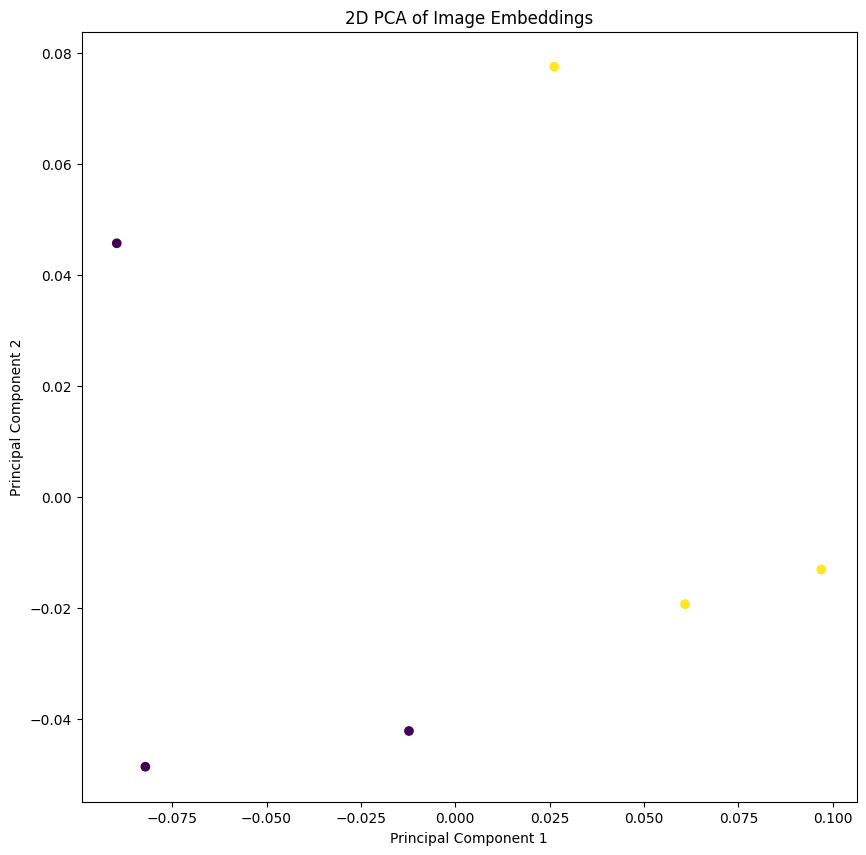

In [38]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Evaluate clusters
silhouette_avg = silhouette_score(vision_embeddings, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualization of clusters in 2D space using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(vision_embeddings)
plt.figure(figsize=(10, 10))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Image Embeddings')
plt.show()

# For image samples from clusters, you can select a few images from each cluster and display them
# Here's a pseudocode for that:
# for i in range(num_clusters):
#     cluster_images = [images[j] for j in range(len(images)) if cluster_labels[j] == i]
#     display_images(cluster_images, f"Cluster {i}")


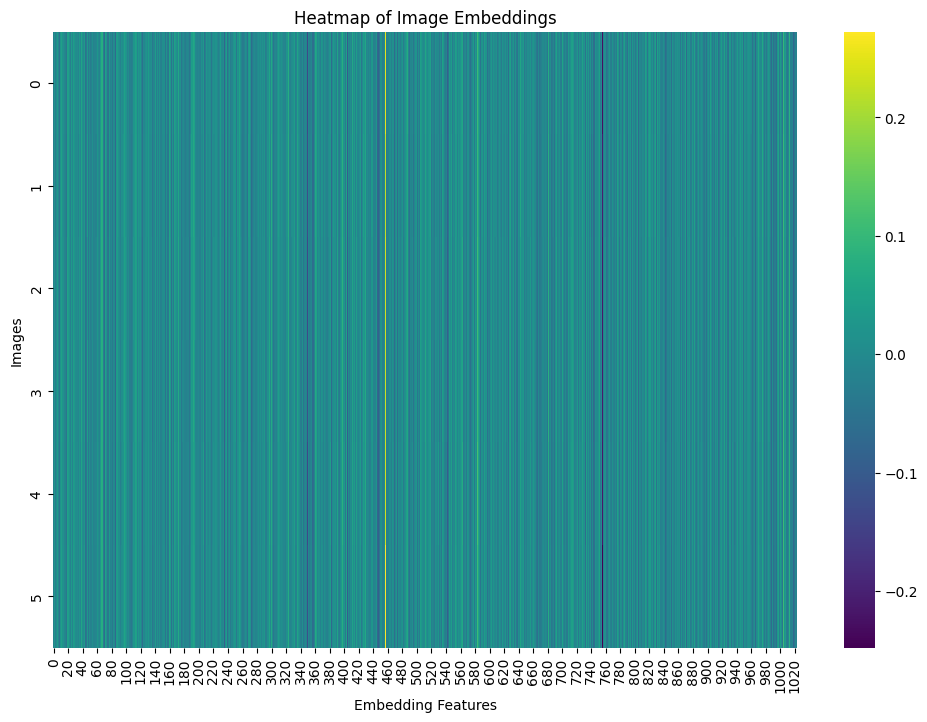

In [41]:
import seaborn as sns

# Select a subset of embeddings for visualization
subset_embeddings = vision_embeddings[:50]  # Adjust as needed

plt.figure(figsize=(12, 8))
sns.heatmap(subset_embeddings, cmap='viridis')
plt.title('Heatmap of Image Embeddings')
plt.xlabel('Embedding Features')
plt.ylabel('Images')
plt.show()


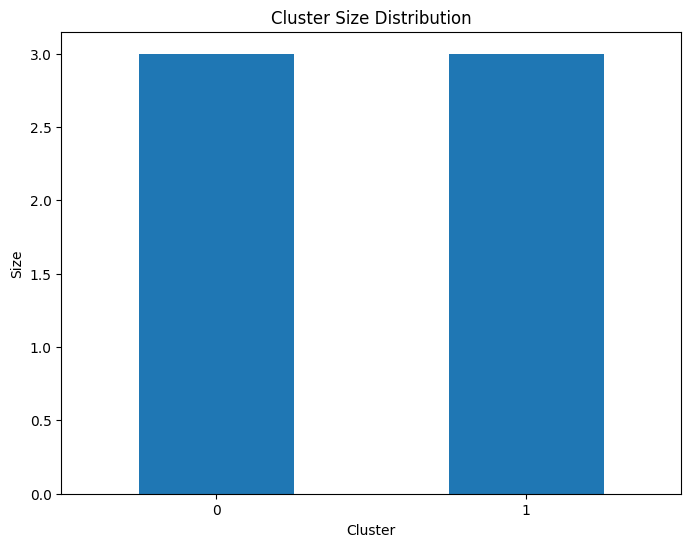

In [42]:
import pandas as pd

cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
plt.figure(figsize=(8, 6))
cluster_sizes.plot(kind='bar')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.xticks(rotation=0)
plt.show()
